# A notebook to work through examples and explain the ```Manifold``` class.
- Click here for the complete script of the class: [manifold.py](https://github.com/hankbesser/brownian-manifold/blob/master/brownian_manifold/manifold.py) 

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import HTML
%load_ext autoreload
%autoreload 2

#### make sure you are in the working directory of the core package ( the ```brownian-manifold``` package ) using the magic command: 
####  ```%cd  ../brownian-manifold/```
- for example with an UNIX machines (this notebook originally ran on an Ubuntu operating system):

In [2]:
%cd ~/Documents/brownian-manifold/

/home/hbesser/Documents/brownian-manifold


to make sure we are in the brownian-manifold directory:

In [3]:
%pwd

'/home/hbesser/Documents/brownian-manifold'

#### Note: On UNIX machines, it is recommended to add  this repository to the PYTHONPATH either via bash or in the environment of use. 

#### Now we can import ```Manifold```

In [4]:
from brownian_manifold.manifold import Manifold

## Create a Manifold object

#### Lets first look at ```Manifold``` documentation with the inline help (i.e. type ```Manifold?``` in the code cell)
- Note: the ```Manifold?``` command is a great way to read general ```Manifold``` functionality used throughout this notebook

A window will pop-up with all the documentation of the Class:

In [5]:
Manifold?

## Part 1:  
### basics of work with a 2-sphere and finite cylinder manifolds

Invoke ```Manifold``` and instantiate ```sphere_manifold``` and ```cylinder_manifold``` (or whatever you would like to name the specific instances of ```Manifold```)

In [6]:
# specify the inital paramters for 2-sphere
sphere_manifold = Manifold(manifold='sphere', 
                          radius_sphere=1, 
                          final_time=137.5, 
                          n_steps=275000)

In [7]:
# specify the inital paramters for finite cylinder
cylinder_manifold = Manifold(manifold='cylinder', 
                          radius_cylinder=1,
                          height_cylinder=10, 
                          final_time=137.5, 
                          n_steps=275000)

### 1A. Basic surface 2-sphere plots

####  Ok now the have created a  ```sphere_manifold``` (or whatever you named it) instance of ```Manifold```. Let's inspect the object.
- ```type sphere_manifold.``` then the ```tab``` key on your keyboard to see the attributes and methods

- Lets just print the inital attributes that we assigned to the instance:

In [8]:
print(sphere_manifold.manifold)
print(sphere_manifold.radius_sphere)
print(sphere_manifold.final_time)
print(sphere_manifold.n_steps)

# self.step_size should equal self.final_time/self.n_steps
print(sphere_manifold.step_size)

sphere
1
137.5
275000
0.0005


#### Plot 1: plot surface of sphere with the  ```get_sphere``` method using default options: 
-note: default setting is set ```plot=False``` (this will come in handy when plotting brownian simulation on the surface of manifolds seen in later in the notebook) 

In [9]:
sphere_manifold.get_sphere?

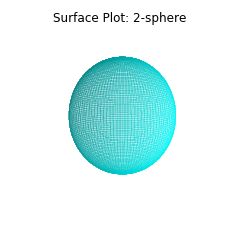

In [10]:
sphere_surface_data = sphere_manifold.get_sphere(plot=True)

#### Plot 2: plot surface of sphere with the ```plot_sphere``` method with the ability to change default plotting options:

Requires the variable storing the ```get_sphere``` surface of sphere data (i.e. this is a positional argument). The variable was named above as ```sphere_surface_data``` (but could be named anything). 

Some changeable ```matplotlib``` option include:

- ```show_axes```: default is False.
- ```has_title```: default is True.
- ```antialiased```: default is False. False shows lines on the sphere and when set to True the lines fade away. 
- ```color```: default is cyan
- ```alpha```: transparency of the surface (0.0-transparent to 1.0-opaque) default is 0.2  

In [11]:
sphere_manifold.plot_sphere?

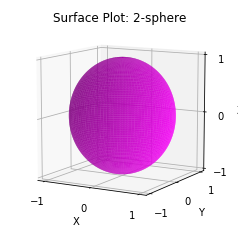

In [12]:
sphere_manifold.plot_sphere(sphere_surface_data, 
                            color='magenta', 
                            alpha=0.7, 
                            antialiased=True, 
                            show_axes=True)

### 1B. Basic surface finite cylinder plots
#### the  ```cylinder_manifold``` (or whatever you named it) instance works just like the ```sphere_manifold``` (or whatever you named it) instance

- Lets just print the inital attributes that we assigned to the instance:

In [13]:
print(cylinder_manifold.manifold)
print(cylinder_manifold.radius_cylinder)
print(cylinder_manifold.height_cylinder)
print(cylinder_manifold.final_time)
print(cylinder_manifold.n_steps)

# self.step_size should equal self.final_time/self.n_steps
print(cylinder_manifold.step_size)

cylinder
1
10
137.5
275000
0.0005


#### Plot 3: plot surface of finite cylinder with the  ```get_cylinder``` method using default options: 
-again note: default setting is set ```plot=False``` (this will come in handy when plotting brownian simulation on the surface of manifolds seen in later in the notebook) 

In [14]:
cylinder_manifold.get_cylinder?

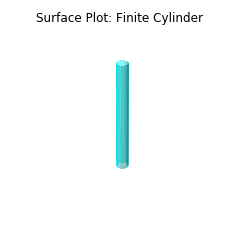

In [15]:
cylinder_surface_data = cylinder_manifold.get_cylinder(plot=True)

#### Plot 4: plot surface of sphere with the ```plot_cylinder``` method with the ability to change default plotting options:

Requires the variable storing the ```get_cylinder``` surface of sphere data (i.e. this is a positional argument). The variable was named above as ```cylinder_surface_data``` (but could be named anything).

- Look at plot 3 (calling the ```plot_sphere``` method) for the options that can be changed. 
- For plotting the surface of the finite cylinder ```show_axes=True``` it is visually informative to compare the height and radius of the finite cylinder.  

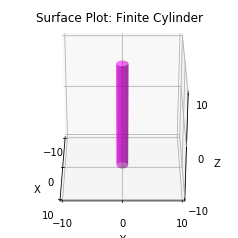

In [16]:
cylinder_manifold.plot_cylinder(cylinder_surface_data, 
                                color='magenta', 
                                alpha=0.7, 
                                antialiased=True, 
                                show_axes=True)

## Part 2 (The Interesting Stuff): 

####  Simulating and visualizing the trajectory of Brownian motion on 2-sphere manifold embedded in three-dimensional Euclidian space.

#### Plot 1: plot surface of sphere with the  ```get_sphere``` method using default options: 

In [17]:
sphere_simdata = sphere_manifold.simulate_brownian_sphere()

In [18]:
data_sphere = pd.DataFrame({'Step Number': np.arange(1,sphere_manifold.n_steps+1),
                            'X' : sphere_simdata[:,0],
                            'Y' : sphere_simdata[:,1],
                            'Z' : sphere_simdata[:,2]})
df = pd.DataFrame(data_sphere)  

#### Setting up the style and hover features of the Panda DataFrames

In [19]:
def hover(hover_color="#ffff99"):
    return dict(selector="tr:hover",
                props=[("background-color", "%s" % hover_color)])

styles = [
    hover(),
    dict(selector="th", props=[("font-size", "160%"),
                               ("text-align", "center")]),
    dict(selector="caption", props=[("caption-side", "bottom"),
                                    ('color', 'red'),
                                    ("text-align", "center"),
                                    ("font-size", "180%")]),
]

#### Viewing the 3-dimensional (x,y,z) data for the first 11 steps

In [20]:
html1 = (df.head(11).style.set_table_styles(styles))
html1

#### Viewing the 3-dimensional (x,y,z) data for the last 11 steps

In [21]:
html2 = (df.tail(11).style.set_table_styles(styles)
          .set_caption("Success, rotation back to the pole."))
html2

Sucess: Rotated back to the pole!
 
[Making sure the last step is rotated back to pole (0,0,1) (and the steps are very small)]

## Vislaizing Brownian Motion on Manifolds made easy:

## using the ```plot_brownian_sphere method```
To plot a figure after creating the simulation data simply;
- Pass in the generated data as the first argument (or kwarg)
- Pass in the the keyword ```steptoplot``` with a list steps numbers you would like to plot per figure as the argument
    - can specifiy 1 to 4 snap shots of a certain step number to plot per figure

#### For example, the simulation data generated in this notebook contains Brownian motion of 275,000 steps on the 2-sphere manifold (parameterized when invoking  ```Manifold``` to instantiate ```sphere_manifold```):

#### Figure 1 (1 plot): veiwing Brownian motion on 2-sphere after all 275,000 steps

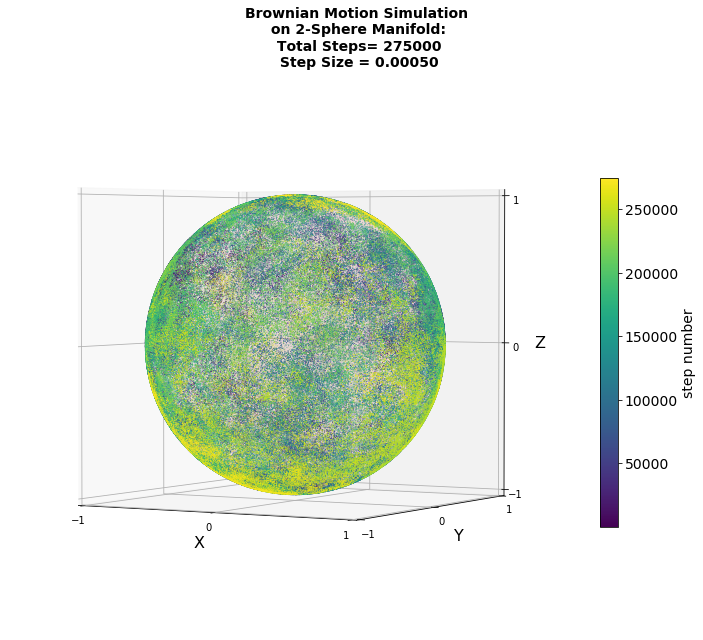

In [22]:
sphere_manifold.plot_brownian_sphere(sphere_simdata,steptoplot=[275000],show_axes=True,)

#### Figure 2 (2 plots): veiwing Brownian Motion on the 2-sphere after only 30,000 steps and after all 275,000 steps

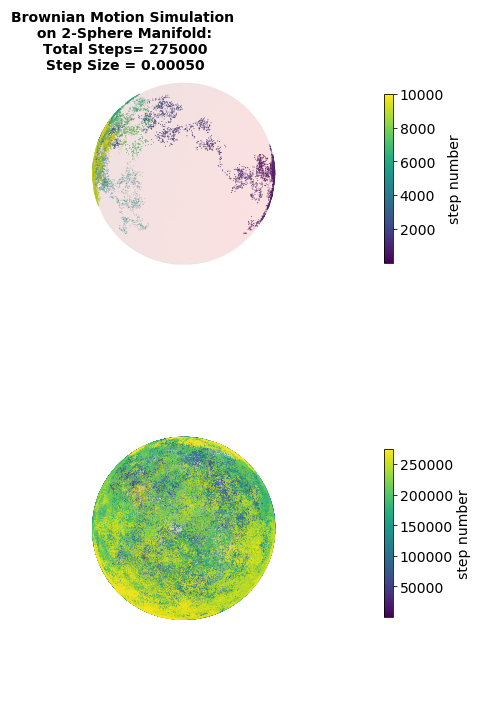

In [23]:
sphere_manifold.plot_brownian_sphere(sphere_simdata,steptoplot=[10000,275000])

#### Figure 3 (4 plots): veiwing Brownian motion on the 2-sphere after 20,000 , 80,000 , 220,000 , and 275,000 steps

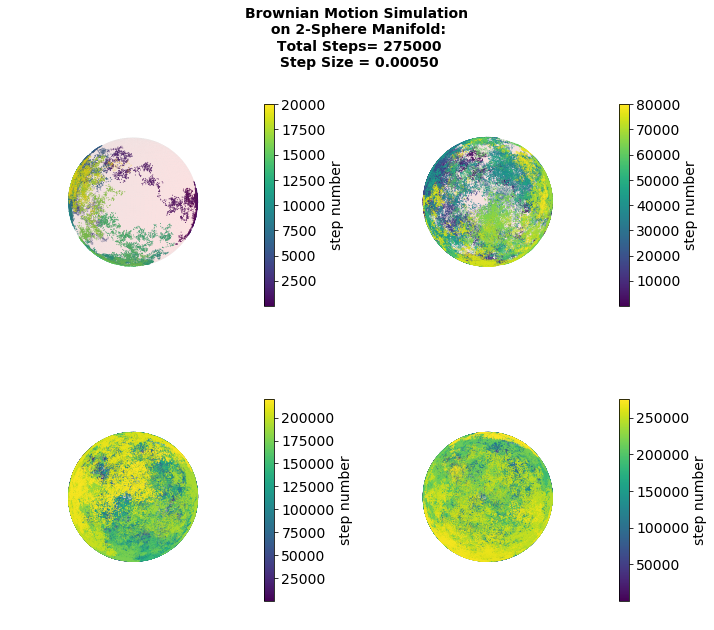

In [24]:
sphere_manifold.plot_brownian_sphere(sphere_simdata,steptoplot=[20000,80000,220000,275000])

# Testing for uniform coverage on the unit 2-sphere

In [25]:
from scipy.integrate import dblquad


#This takes a function (input as string) in cartesian coordinates and
#returns the integral of this function over the surface of the unit sphere
#after dividing by the surface area to normalize

def surface_int(f):

#convert function string to spherical coordinates assuming radius of one
#the new x is theta and the new y is phi in spherical coordinates
    g='('
    for i in range(len(f)):
        if f[i] == 'x':
            g = g+'(np.sin(y)*np.cos(x))'
        elif f[i] == 'y':
            g = g+'(np.sin(y)*np.sin(x))'
        elif f[i] == 'z':
            g = g+'(np.cos(y))'
        else:
            g = g+f[i]

#adds Jacobian to make the returned string the integrand
    g = g+')*np.sin(y)'

#calculate the integral over the surface of the unit sphere
    R = dblquad(eval('lambda y,x: '+g),0,2*np.pi,lambda x: 0,lambda x: np.pi)
#divide by surface area
    return (R[0])/(4*np.pi)

#### Test function 1: $4x^2 + 7y^2$

In [26]:
test1 = surface_int('4*x**2 + 7*y**2')

#### Output: double integral of this function over the surface of the unit sphere

In [27]:
print(test1)

3.666666666666666


#### Test function 2:  $3x^2 + y^2 +z^2$

In [28]:
test2 = surface_int('3*x**2 + y**2 + z**2')

#### Output: double integral of this function over the surface of the unit sphere

In [29]:
print(test2)

1.6666666666666663


### Discretize total time into steps  

In [30]:
dt=sphere_manifold.step_size
all_steps = np.arange(1,sphere_manifold.n_steps+1)
time_label= np.arange(dt,sphere_manifold.final_time+dt,dt)

### Calculate space average at each step 

#### for test function 1: 

In [31]:
tester_function_cum_output = np.cumsum(4*(sphere_simdata[:,0]**2) + 7**(sphere_simdata[:,1]**2))
space_average = tester_function_cum_output/all_steps

#### for test function 2: 

In [32]:
tester_function_cum_output2 = np.cumsum(3*(sphere_simdata[:,0]**2) + (sphere_simdata[:,1])**2 + (sphere_simdata[:,2])**2)
space_average2 = tester_function_cum_output2/all_steps

#### Plotting both test functions with respective surfrace integral values to observe convergence

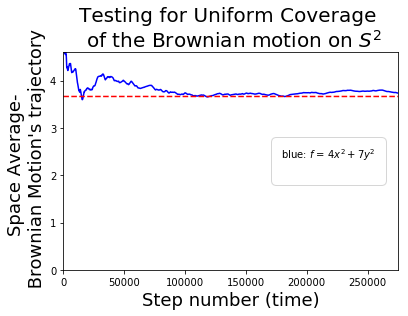

In [33]:
plt.figure()
ax = plt.gca()
ax.set_title("Testing for Uniform Coverage \n of the Brownian motion on $S^2$",fontsize=20)
ax.set_ylabel("Space Average- \n Brownian Motion's trajectory",fontsize=18)
ax.set_xlabel('Step number (time)',fontsize=18)
ax.set_xlim(0,sphere_manifold.n_steps)
ax.set_ylim(0,4.6)
ax.legend("",title= 'blue: $f$ = $4x^2 + 7y^2$',loc=5,fontsize=25)
plt.plot(all_steps,space_average,'b-')
plt.plot(all_steps,[test1]*len(all_steps),'r--')
plt.show()
plt.show()

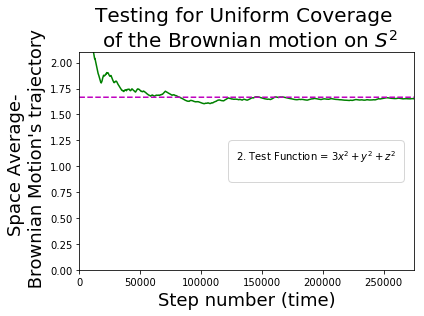

In [34]:
plt.figure()
ax = plt.gca()
ax.set_title("Testing for Uniform Coverage \n of the Brownian motion on $S^2$",fontsize=20)
ax.set_ylabel("Space Average- \n Brownian Motion's trajectory",fontsize=18)
ax.set_xlabel('Step number (time)',fontsize=18)
ax.set_xlim(0,sphere_manifold.n_steps)
ax.set_ylim(0,2.1)
ax.legend("",title= '2. Test Function = $3x^2 + y^2 + z^2$',loc=5,fontsize=20)
plt.plot(all_steps,space_average2,'g-')
plt.plot(all_steps,[test2]*len(all_steps),'m--')
plt.show()